<a href="https://colab.research.google.com/github/aimldlnlp/ml-algorithms/blob/main/Decision%20Tree/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [7]:
df.shape

(619040, 7)

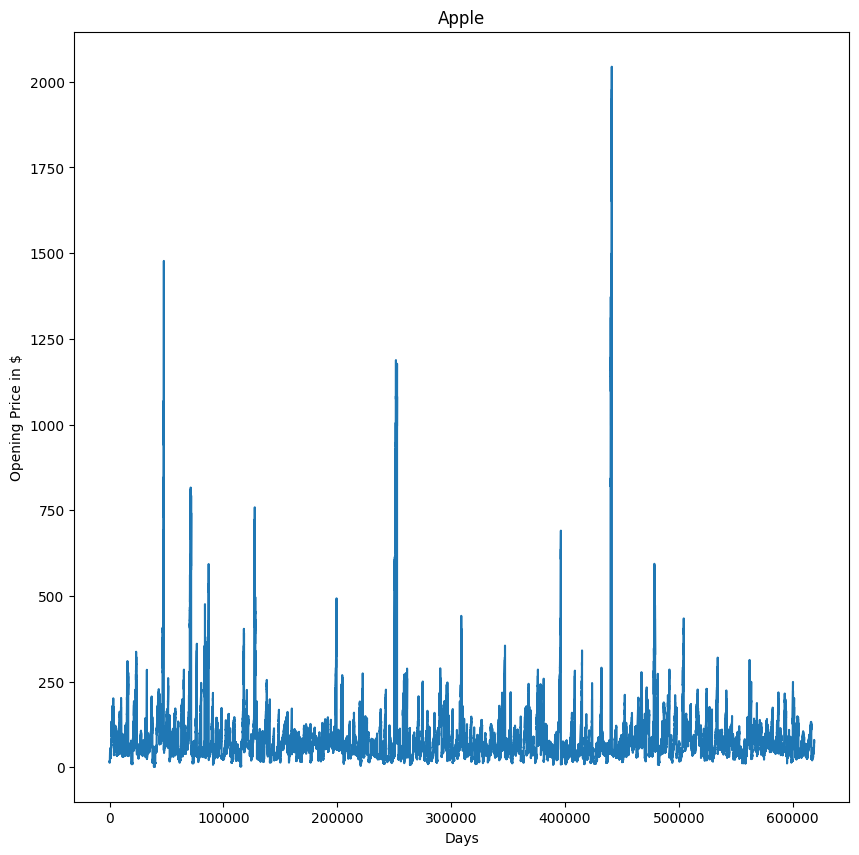

In [11]:
plt.figure(figsize=(10,10))
plt.title("Apple")
plt.xlabel("Days")
plt.ylabel("Opening Price in $")
plt.plot(df['open'])
plt.show()

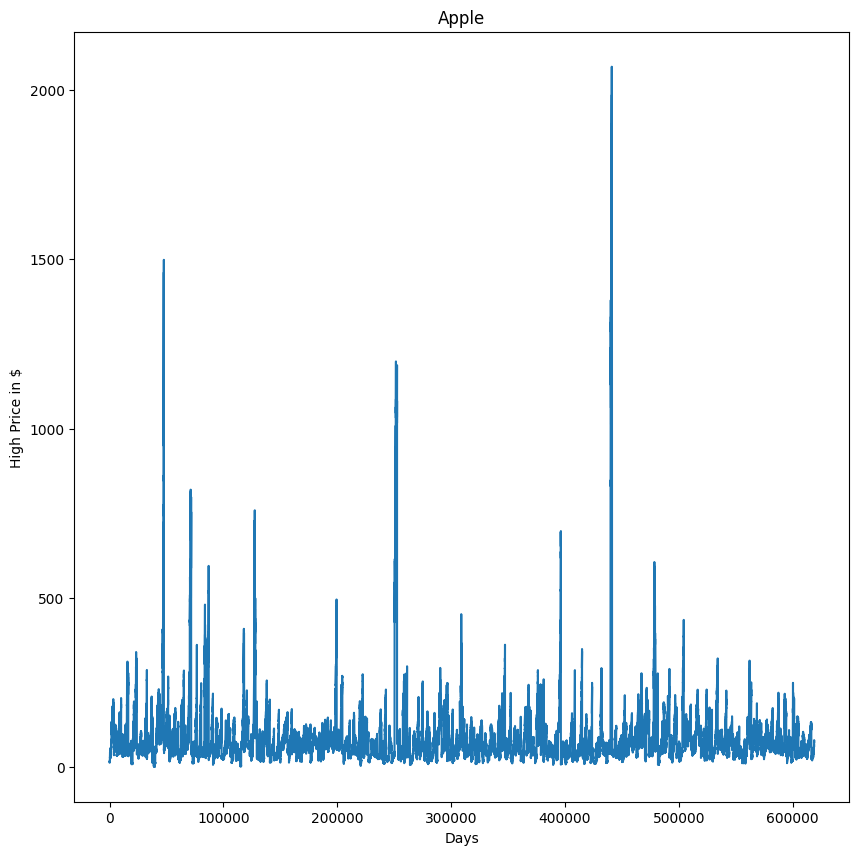

In [12]:
plt.figure(figsize=(10,10))
plt.title("Apple")
plt.xlabel("Days")
plt.ylabel("High Price in $")
plt.plot(df['high'])
plt.show()

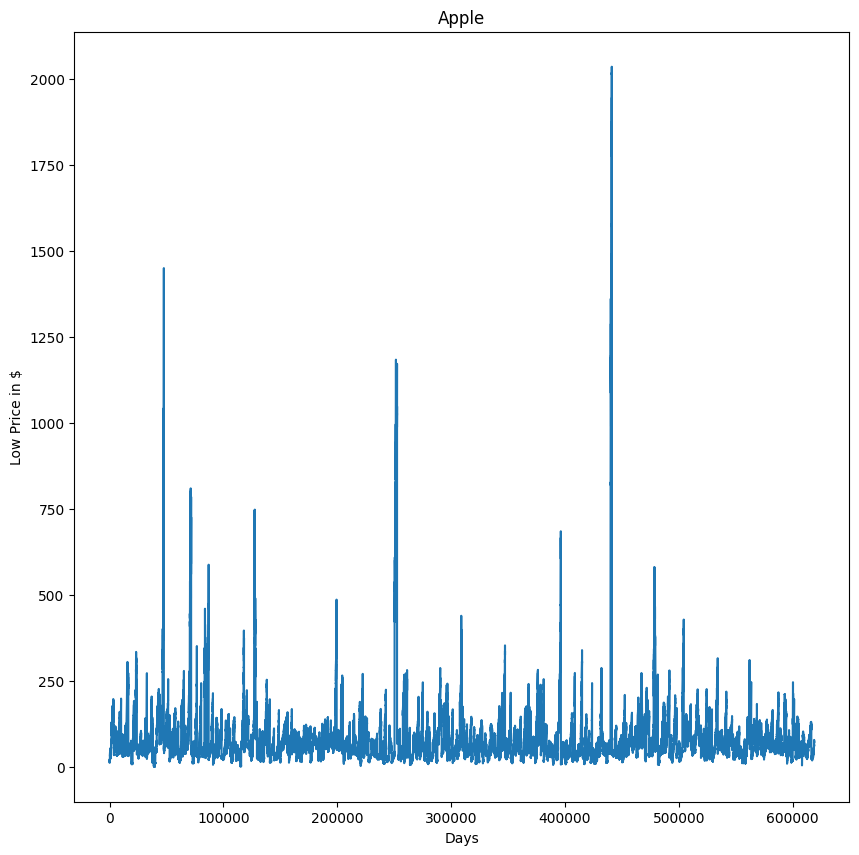

In [13]:
plt.figure(figsize=(10,10))
plt.title("Apple")
plt.xlabel("Days")
plt.ylabel("Low Price in $")
plt.plot(df['low'])
plt.show()

In [15]:
df2 = df['close']
df2.tail()

,close
619035,77.82
619036,76.78
619037,73.83
619038,73.27
619039,73.86


In [17]:
df2 = pd.DataFrame(df2)
df2.tail()

,close
619035,77.82
619036,76.78
619037,73.83
619038,73.27
619039,73.86


In [18]:
future_days = 100
df2['Prediction'] = df2[['close']].shift(-future_days)

In [19]:
df2.tail()

,close,Prediction
619035,77.82,NaN
619036,76.78,NaN
619037,73.83,NaN
619038,73.27,NaN
619039,73.86,NaN


In [23]:
y = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(y)

[[14.75]
 [14.46]
 [14.27]
 ...
 [65.4 ]
 [65.28]
 [65.25]]


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train, y_train)

In [29]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[55.12],
       [55.57],
       [56.46],
       [56.11],
       [56.28],
       [56.47],
       [55.59],
       [58.87],
       [59.47],
       [58.81],
       [59.43],
       [59.9 ],
       [59.72],
       [59.88],
       [60.  ],
       [60.33],
       [59.73],
       [59.91],
       [60.31],
       [60.31],
       [61.43],
       [62.3 ],
       [62.58],
       [62.61],
       [62.26],
       [62.28],
       [62.64],
       [62.5 ],
       [62.67],
       [62.98],
       [63.26],
       [62.58],
       [62.59],
       [61.85],
       [61.96],
       [62.23],
       [62.39],
       [62.55],
       [63.03],
       [63.  ],
       [63.  ],
       [63.51],
       [62.78],
       [62.72],
       [62.76],
       [62.95],
       [62.5 ],
       [62.38],
       [62.67],
       [62.55],
       [61.79],
       [62.59],
       [62.47],
       [62.21],
       [62.56],
       [63.05],
       [63.35],
       [63.07],
       [62.46],
       [62.42],
       [62.75],
       [63.16],
       [

In [30]:
tree_predicition = tree.predict(x_future)
print(tree_predicition)

[55.12 55.57 56.46 56.11 56.28 56.47 55.59 58.87 59.47 58.81 59.43 59.9
 59.72 59.88 60.   60.33 59.73 59.91 60.31 60.31 61.43 62.3  62.58 62.61
 62.26 62.28 62.64 62.5  62.67 62.98 63.26 62.58 62.59 61.85 61.96 62.23
 62.39 62.55 63.03 63.   63.   63.51 62.78 62.72 62.76 62.95 62.5  62.38
 62.67 62.55 61.79 62.59 62.47 62.21 62.56 63.05 63.35 63.07 62.46 62.42
 62.75 63.16 63.29 61.28 62.06 62.01 62.21 62.52 62.12 61.54 62.28 62.12
 61.83 60.   60.81 59.74 59.73 60.74 61.03 61.5  60.9  60.75 61.35 61.6
 61.36 61.39 61.33 61.54 61.5  61.94 62.7  62.87 63.17 63.39 64.85 64.7
 65.28 65.4  65.28 65.25]


In [32]:
predicition = tree_predicition
valid = df2[x.shape[0]:]
valid['Prediction'] = predicition

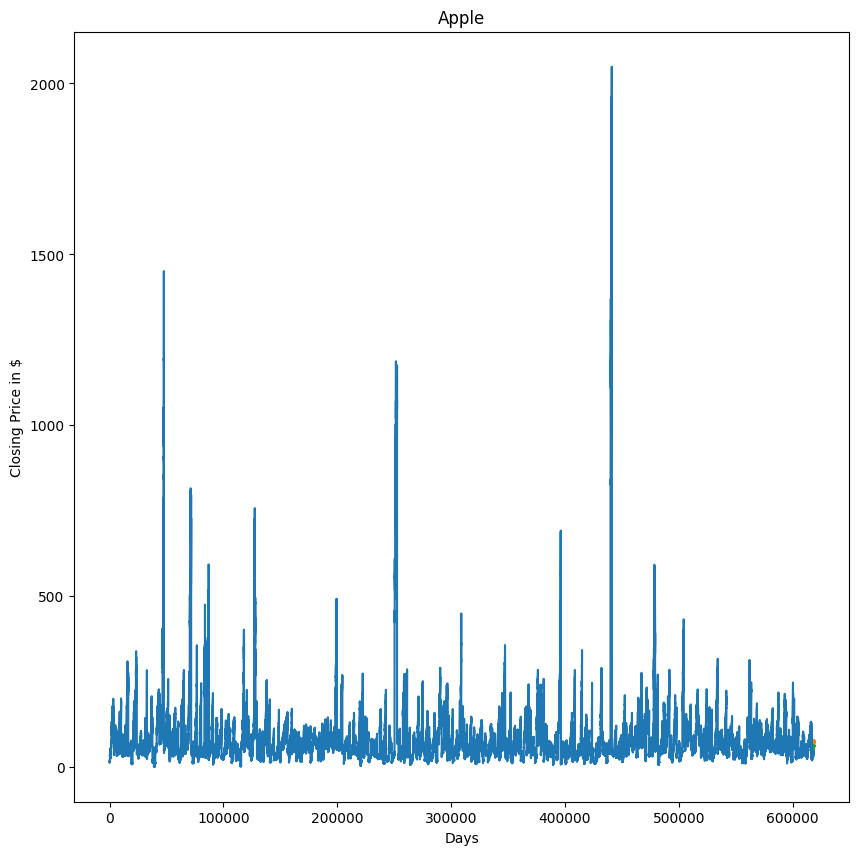

In [33]:
plt.figure(figsize=(10,10))
plt.title("Apple")
plt.xlabel("Days")
plt.ylabel("Closing Price in $")
plt.plot(df2['close'])
plt.plot(valid[['close', 'Prediction']])